# Eden Anderson
## Module 6 Assignment / 44620

GitHub Repository Link

# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Eden Anderson

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

# Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests
import pickle

article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text


with open('module6.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

# Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [2]:
from bs4 import BeautifulSoup

parser = 'html.parser'

with open('module6.pkl', 'rb') as f:
    module6_html = pickle.load(f)
soup = BeautifulSoup(module6_html, parser)
module6_element = soup.find('article')
print(module6_element.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

# Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [3]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter
nlp = spacy.load('en_core_web_sm')
doc = nlp(module6_element.get_text())
non_ws_tokens = []
for token in doc:
    if not token.is_space:
        non_ws_tokens.append(token)

def module6_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token.text.lower() for token in doc if module6_words(token)]

word_freq = Counter(map(str,interesting_tokens))
print('The top 5 most frequent tokens and their frequencies are: ', word_freq.most_common(5))

The top 5 most frequent tokens and their frequencies are:  [('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]


# Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
module6_lemmas = [token.lemma_.lower() for token in doc if module6_words(token)]
lemma_freq = Counter(module6_lemmas)
print('The top 5 most frequent lemmas and their frequencies are: ', lemma_freq.most_common(5))

The top 5 most frequent lemmas and their frequencies are:  [('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10)]


# Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [5]:
interesting_token = set()
for token, freq in word_freq.most_common(5):
    interesting_token.add(token)

sentences = list(doc.sents) 
top_tokens = ['laser', 'headlights', 'technology', 'headlight', 'led']
top_lemmas = ['laser', 'headlight', 'beam', 'technology', 'light']

len(sentences)

def wordcount(sent):
    count = 0
    for token in sent:
        if not(token.is_space or token.is_punct):
            count += 1
    return count
print()

def score_sentence_by_token(sentence, interesting_token):
    total = wordcount(sentence)
    for i in range(len(sentences)):
        sentence = sentences[i]
    for sentence in sentences:
        count = 0
        for token in sentence:
            if token.text.lower() in interesting_token:
                count += 1
        print('Output: score_sentence_by_token: ',count,'/',total,'=', count/total)
        return count, total, count/total

chosen_sentence = sentences[1]
print(chosen_sentence)
score_sentence_by_token(chosen_sentence, interesting_token)




When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Output: score_sentence_by_token:  2 / 21 = 0.09523809523809523


(2, 21, 0.09523809523809523)

### Question 7 Answer
From your histogram, what seems to be the most common range of scores:
Similarly to the scores with tokens, the most common range of scores with lemmas is between 0.05 through 0.15, as there were over 45 within it.

In [6]:
# Same process but with lemmas

interesting_lemma = set()
for lemma, freq in word_freq.most_common(5):
    interesting_lemma.add(lemma)

def score_sentence_by_lemma(sentence, interesting_lemma):
    total = wordcount(sentence)
    for i in range(len(sentences)):
        sentence = sentences[i]
    for sentence in sentences:
        count = 0
        for token in sentence:
            if token.lemma_.lower() in interesting_lemma:
                count += 1
        print('Output: score_sentence_by_lemma: ',count,'/',total,'=', count/total)
        return count, total, count/total

chosen_sentence = sentences[1]
print(chosen_sentence)
score_sentence_by_lemma(chosen_sentence, interesting_lemma)

When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Output: score_sentence_by_lemma:  2 / 21 = 0.09523809523809523


(2, 21, 0.09523809523809523)

# Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Text(0.5, 1.0, 'Frequency of Sentence Scores (Tokens)')

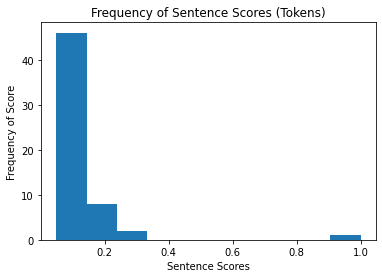

In [7]:
from matplotlib import pyplot as plt

interesting_token = set()
for token, freq in word_freq.most_common(5):
    interesting_token.add(token)

sentences = list(doc.sents) 
top_tokens = ['laser', 'headlights', 'technology', 'headlight', 'led']

def score_token(sentence, interesting_token):
    total = wordcount(sentence)
    for i in range(len(sentences)):
        sentence = sentences[i]
    for sentence in sentences:
        count = 0
        for token in sentence:
            if token.text.lower() in interesting_token:
                count += 1
        return count/total
    
S1 = sentences[0]
f1 = score_token(S1, interesting_token)
S2 = sentences[1]
f2 = score_token(S2, interesting_token)               
S3 = sentences[2]
f3 = score_token(S3, interesting_token)               
S4 = sentences[3]
f4 = score_token(S4, interesting_token)
S5 = sentences[4]
f5 = score_token(S5, interesting_token)
S6 = sentences[5]
f6 = score_token(S6, interesting_token)
S7 = sentences[6]
f7 = score_token(S7, interesting_token)
S8 = sentences[7]
f8 = score_token(S8, interesting_token)
S9 = sentences[8]
f9 = score_token(S9, interesting_token)
S10 = sentences[9]
f10 = score_token(S10, interesting_token)
S11 = sentences[10]
f11 = score_token(S11, interesting_token)
S12 = sentences[11]
f12 = score_token(S12, interesting_token)
S13 = sentences[12]
f13 = score_token(S13, interesting_token)
S14 = sentences[13]
f14 = score_token(S14, interesting_token)
S15 = sentences[14]
f15 = score_token(S15, interesting_token)
S16 = sentences[15]
f16 = score_token(S16, interesting_token)
S17 = sentences[17]
f17 = score_token(S17, interesting_token)
S18 = sentences[18]
f18 = score_token(S18, interesting_token)
S19 = sentences[19]
f19 = score_token(S19, interesting_token)
S20 = sentences[20]
f20 = score_token(S20, interesting_token)
S21 = sentences[21]
f21 = score_token(S21, interesting_token)
S22 = sentences[22]
f22 = score_token(S22, interesting_token)
S23 = sentences[23]
f23 = score_token(S23, interesting_token)
S24 = sentences[24]
f24 = score_token(S24, interesting_token)
S25 = sentences[25]
f25 = score_token(S25, interesting_token)
S26 = sentences[26]
f26 = score_token(S26, interesting_token)
S27 = sentences[27]
f27 = score_token(S27, interesting_token)
S28 = sentences[28]
f28 = score_token(S28, interesting_token)
S29 = sentences[29]
f29 = score_token(S29, interesting_token)
S30 = sentences[30]
f30 = score_token(S30, interesting_token)
S31 = sentences[31]
f31 = score_token(S31, interesting_token)
S32 = sentences[32]
f32 = score_token(S32, interesting_token)
S33 = sentences[33]
f33 = score_token(S33, interesting_token)
S34 = sentences[34]
f34 = score_token(S34, interesting_token)
S35 = sentences[35]
f35 = score_token(S35, interesting_token)
S36 = sentences[36]
f36 = score_token(S36, interesting_token)
S37 = sentences[37]
f37 = score_token(S37, interesting_token)
S38 = sentences[38]
f38 = score_token(S38, interesting_token)
S39 = sentences[39]
f39 = score_token(S39, interesting_token)
S40 = sentences[40]
f40 = score_token(S40, interesting_token)
S41 = sentences[41]
f41 = score_token(S41, interesting_token)
S42 = sentences[42]
f42 = score_token(S42, interesting_token)
S43 = sentences[43]
f43 = score_token(S43, interesting_token)
S44 = sentences[44]
f44 = score_token(S44, interesting_token)
S45 = sentences[45]
f45 = score_token(S45, interesting_token)
S46 = sentences[45]
f46 = score_token(S46, interesting_token)
S47 = sentences[47]
f47 = score_token(S47, interesting_token)
S48 = sentences[48]
f48 = score_token(S48, interesting_token)
S49 = sentences[49]
f49 = score_token(S49, interesting_token)
S50 = sentences[50]
f50 = score_token(S50, interesting_token)
S51 = sentences[51]
f51 = score_token(S51, interesting_token)
S52 = sentences[52]
f52 = score_token(S52, interesting_token)
S53 = sentences[53]
f53 = score_token(S53, interesting_token)
S54 = sentences[54]
f54 = score_token(S54, interesting_token)
S55 = sentences[55]
f55 = score_token(S55, interesting_token)
S56 = sentences[56]
f56 = score_token(S56, interesting_token)
S57 = sentences[16]
f57 = score_token(S16, interesting_token)

token_list = [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,
              f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,
              f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57]

x = token_list
plt.hist(x)
plt.xlabel('Sentence Scores')
plt.ylabel('Frequency of Score')
plt.title("Frequency of Sentence Scores (Tokens)")

### Question 6 Answer
From your histogram, what seems to be the most common range of scores:
The most common range of scores is between 0.05 through 0.15, as there were over 45 within it.

# Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Text(0.5, 1.0, 'Frequency of Sentence Scores (Lemmas)')

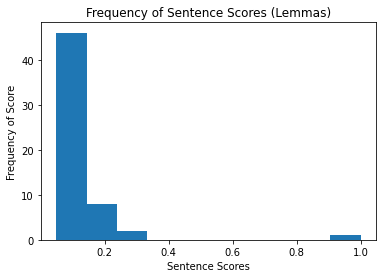

In [8]:
interesting_lemma = set()
for lemma, freq in word_freq.most_common(5):
    interesting_lemma.add(lemma)

sentences = list(doc.sents) 
top_lemmas = ['laser', 'headlight', 'beam', 'technology', 'light']

def score_lemma(sentence, interesting_lemma):
    total = wordcount(sentence)
    for i in range(len(sentences)):
        sentence = sentences[i]
    for sentence in sentences:
        count = 0
        for token in sentence:
            if token.lemma_.lower() in interesting_lemma:
                count += 1
        return count/total
    
S1 = sentences[0]
f1 = score_lemma(S1, interesting_lemma)
S2 = sentences[1]
f2 = score_lemma(S2, interesting_lemma)               
S3 = sentences[2]
f3 = score_lemma(S3, interesting_lemma)               
S4 = sentences[3]
f4 = score_lemma(S4, interesting_lemma)
S5 = sentences[4]
f5 = score_lemma(S5, interesting_lemma)
S6 = sentences[5]
f6 = score_lemma(S6, interesting_lemma)
S7 = sentences[6]
f7 = score_lemma(S7, interesting_lemma)
S8 = sentences[7]
f8 = score_lemma(S8, interesting_lemma)
S9 = sentences[8]
f9 = score_lemma(S9, interesting_lemma)
S10 = sentences[9]
f10 = score_lemma(S10, interesting_lemma)
S11 = sentences[10]
f11 = score_lemma(S11, interesting_lemma)
S12 = sentences[11]
f12 = score_lemma(S12, interesting_lemma)
S13 = sentences[12]
f13 = score_lemma(S13, interesting_lemma)
S14 = sentences[13]
f14 = score_lemma(S14, interesting_lemma)
S15 = sentences[14]
f15 = score_lemma(S15, interesting_lemma)
S16 = sentences[15]
f16 = score_lemma(S16, interesting_lemma)
S17 = sentences[17]
f17 = score_lemma(S17, interesting_lemma)
S18 = sentences[18]
f18 = score_lemma(S18, interesting_lemma)
S19 = sentences[19]
f19 = score_lemma(S19, interesting_lemma)
S20 = sentences[20]
f20 = score_lemma(S20, interesting_lemma)
S21 = sentences[21]
f21 = score_lemma(S21, interesting_lemma)
S22 = sentences[22]
f22 = score_lemma(S22, interesting_lemma)
S23 = sentences[23]
f23 = score_lemma(S23, interesting_lemma)
S24 = sentences[24]
f24 = score_lemma(S24, interesting_lemma)
S25 = sentences[25]
f25 = score_lemma(S25, interesting_lemma)
S26 = sentences[26]
f26 = score_lemma(S26, interesting_lemma)
S27 = sentences[27]
f27 = score_lemma(S27, interesting_lemma)
S28 = sentences[28]
f28 = score_lemma(S28, interesting_lemma)
S29 = sentences[29]
f29 = score_lemma(S29, interesting_lemma)
S30 = sentences[30]
f30 = score_lemma(S30, interesting_lemma)
S31 = sentences[31]
f31 = score_lemma(S31, interesting_lemma)
S32 = sentences[32]
f32 = score_lemma(S32, interesting_lemma)
S33 = sentences[33]
f33 = score_lemma(S33, interesting_lemma)
S34 = sentences[34]
f34 = score_lemma(S34, interesting_lemma)
S35 = sentences[35]
f35 = score_lemma(S35, interesting_lemma)
S36 = sentences[36]
f36 = score_lemma(S36, interesting_lemma)
S37 = sentences[37]
f37 = score_lemma(S37, interesting_lemma)
S38 = sentences[38]
f38 = score_lemma(S38, interesting_lemma)
S39 = sentences[39]
f39 = score_lemma(S39, interesting_lemma)
S40 = sentences[40]
f40 = score_lemma(S40, interesting_lemma)
S41 = sentences[41]
f41 = score_lemma(S41, interesting_lemma)
S42 = sentences[42]
f42 = score_lemma(S42, interesting_lemma)
S43 = sentences[43]
f43 = score_lemma(S43, interesting_lemma)
S44 = sentences[44]
f44 = score_lemma(S44, interesting_lemma)
S45 = sentences[45]
f45 = score_lemma(S45, interesting_lemma)
S46 = sentences[45]
f46 = score_lemma(S46, interesting_lemma)
S47 = sentences[47]
f47 = score_lemma(S47, interesting_lemma)
S48 = sentences[48]
f48 = score_lemma(S48, interesting_lemma)
S49 = sentences[49]
f49 = score_lemma(S49, interesting_lemma)
S50 = sentences[50]
f50 = score_lemma(S50, interesting_lemma)
S51 = sentences[51]
f51 = score_lemma(S51, interesting_lemma)
S52 = sentences[52]
f52 = score_lemma(S52, interesting_lemma)
S53 = sentences[53]
f53 = score_lemma(S53, interesting_lemma)
S54 = sentences[54]
f54 = score_lemma(S54, interesting_lemma)
S55 = sentences[55]
f55 = score_lemma(S55, interesting_lemma)
S56 = sentences[56]
f56 = score_lemma(S56, interesting_lemma)
S57 = sentences[16]
f57 = score_lemma(S16, interesting_lemma)

lemma_list = [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,
              f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,
              f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57]

x = lemma_list
plt.hist(x)
plt.xlabel('Sentence Scores')
plt.ylabel('Frequency of Score')
plt.title("Frequency of Sentence Scores (Lemmas)")

### Question 7 Answer
From your histogram, what seems to be the most common range of scores:
Similarly to the scores with tokens, the most common range of scores with lemmas is between 0.05 through 0.15, as there were over 45 within it.

# Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

### Question 8 Answer
In Question 3, if we only considered nouns, "led" would be removed - leaving laser, headlights, headlight, and technology.

In Question 4, if we only considered nouns, again, "led" would be removed - leaving laser, headlight, beam, and technology.

To change the code to consider only nouns, we would need to add lines that would choose only nouns, like the following 2 lines:

for noun_chunk in doc.noun_chunks: 

    print(noun_chunk.text)

(There are several different ways to code the noun position in spacy, as I found in my searches to understand this answer.  I chose one of them.)